## 1. Import relevant libraries and load dataset.

In [53]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV
from IPython.display import Image
import seaborn as sns
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable

In [2]:
# load train.csv into pandas dataframe
train_df = pd.read_csv("train.csv")
# print the first 5 rows
train_df.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [3]:
# load test.csv into pandas dataframe
test_df = pd.read_csv("test.csv")
# print the first 5 rows
test_df.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [4]:
# how many datapoints and features present in train and test dataset
print("Training Dataset:",train_df.shape)
print("Test Dataset    :",test_df.shape)

Training Dataset: (250, 302)
Test Dataset    : (19750, 301)


In [5]:
y = train_df["target"].values # store values of feature "target"
X = train_df.drop(["id","target"],axis=1) # drop id and class label from the dataset
print("Size of class label :",len(y))
print("Class Label         :")
print(y)
print()
print("Number of data points belonging to each class label: ")
print(train_df["target"].value_counts())
print()
print("Number of rows and columns in train dataset:",X.shape)
print("Train Dataset in tabular format            :")
X.head(2)

Size of class label : 250
Class Label         :
[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]

Number of data points belonging to each class label: 
1.0    160
0.0     90
Name: target, dtype: int64

Number of rows and columns in train dataset: (250, 300)
Train Dataset in tabular form

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


## 2. Splitting data into Train and cross validation(or test): Stratified Sampling

In [6]:
# Split the dataset in X_train, X_test, y_train, y_test using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state=42)
print("Shape of X_train :", X_train.shape)
print("Shape of X_test  :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test  :", y_test.shape)

Shape of X_train : (225, 300)
Shape of X_test  : (25, 300)
Shape of y_train : (225,)
Shape of y_test  : (25,)


## 3. Over-sampling

In [7]:
# Reference: https://imbalanced-learn.org/stable/over_sampling.html
# Over-sampling using RandomOverSample technique
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_train).items()))

[(0.0, 144), (1.0, 144)]


## 4. Data Scaling

In [8]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize train features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
# print the first 5 rows
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.286376,-0.860225,-1.101927,0.141082,0.715762,0.278982,-1.340203,1.400034,1.318056,-0.752581,...,0.170780,1.121303,1.585252,-1.380819,1.953920,0.947327,-0.034106,-1.278680,1.440599,0.894594
1,0.256991,-0.996117,0.297932,-0.495988,-0.057367,-1.014300,1.221035,-1.430578,1.039782,-0.635137,...,0.417970,-0.898443,-1.560543,0.683146,1.080389,-0.042956,0.541847,-0.784760,-0.720447,0.858163
2,-0.239699,0.638553,0.092467,0.424895,1.478745,-1.309053,-1.874004,1.029346,-2.413534,-1.290041,...,-1.461297,0.089339,1.043565,0.183637,0.621399,0.126117,-0.072639,-0.732929,-0.012468,0.045221
3,-0.156285,0.574079,0.504434,1.197834,-1.509267,0.568395,0.358896,0.646974,-1.485605,-1.790674,...,-0.183974,0.095651,-0.163192,-0.210829,-2.479444,0.752168,0.040930,1.555769,-0.311284,-1.394341
4,-1.479530,0.315190,-0.515626,-0.120590,-0.389143,0.128402,1.972385,-0.517135,-0.291957,-0.061847,...,-1.951540,1.353784,-1.769192,-0.428736,0.932546,1.368559,-1.160664,0.196981,-0.052505,0.829018


In [9]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize test features by removing the mean and scaling to unit variance.
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
# print the first 5 rows
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.803689,-1.818411,-0.267615,-0.727467,0.080619,-0.848768,0.542201,-0.158130,0.185084,-0.599306,...,1.024052,-0.345117,0.434669,-0.330398,-1.618475,-0.407187,-1.054194,0.908389,-0.564203,-0.218126
1,1.600141,0.870660,-1.633230,-0.882458,0.635608,-0.215477,0.764786,-0.050854,-1.519082,0.759272,...,1.974546,-0.789040,-0.321686,1.326808,0.140183,-0.040057,1.394624,-1.371163,-0.370852,-0.084891
2,-1.303224,-0.075623,-0.502136,0.369542,0.991734,-1.586719,1.642033,0.182818,2.655025,0.900604,...,-1.037246,1.410590,0.432663,-0.472317,-1.614609,1.776265,0.379607,-0.285759,-1.227263,0.448049
3,-2.093758,-2.401655,0.469153,-0.661043,-1.112557,1.088485,0.240050,-0.254785,-0.199897,0.755291,...,0.927865,-0.301987,1.930326,-0.523721,0.796298,0.359920,-0.607018,-0.909765,0.275607,1.775194
4,-0.061497,0.362802,2.014290,-0.692242,1.223064,-2.647189,-0.429720,-0.522445,-0.260573,-1.551804,...,-0.629744,2.638217,-0.769079,0.261860,0.935445,0.137710,0.171736,-0.243075,0.707230,-1.455754


In [10]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# Standardize test features by removing the mean and scaling to unit variance.
test = test_df.drop("id",axis=1) 
test = scaler.transform(test)
test = pd.DataFrame(test)
# print the first 5 rows
test.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.442776,-1.025874,-1.753603,0.315194,-0.697583,0.551308,0.476735,-0.193181,-0.691584,1.258910,...,-0.149843,-2.904514,-0.842307,2.325826,-0.236672,2.138564,0.539819,-0.120103,0.268771,1.065302
1,0.704392,0.905377,-0.611094,1.359869,-0.852818,0.527814,0.520043,-0.388615,0.239483,1.323604,...,-0.765233,-0.209415,0.030411,0.680911,-0.310110,-1.015848,-3.259651,0.271171,-0.646231,-0.745861
2,1.627630,0.503653,-0.157619,0.844577,-0.456107,1.540226,-0.768129,-2.190011,-1.414468,0.140198,...,-0.156049,0.229249,-0.603563,-0.819850,0.001037,0.756033,0.911959,0.122792,-1.331751,2.609995
3,-0.558188,-1.841225,-0.806182,0.585924,1.642096,0.561988,-1.491279,0.710703,0.561695,0.538317,...,-0.406342,-0.967872,0.261129,-0.030917,-0.776831,0.963751,2.367053,1.055752,-1.599318,-1.545271
4,0.683539,-0.244248,1.118753,-1.629229,0.035976,0.410340,0.724499,-1.928723,-1.470959,-0.951641,...,2.200016,-1.286613,0.222007,1.329043,-0.107188,0.389870,-0.146661,-0.172950,-1.161836,0.905003


## 5. Cross Validation and Hyper parameter Tuning

In [11]:
# Reference: https://towardsdatascience.com/how-to-train-test-split-kfold-vs-stratifiedkfold-281767b93869
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# perform StratifiedKFold Cross Validation and Hyperparameter Tuning using GridSearchCV
def CrossValidationandHyperparameterTuning(model,hyperparameters):
    """
    This function performs StratifiedKFold Cross Validation and Hyperparameter Tuning using GridSearchCV.
    Parameters     
    model          : instance of model
    hyperparameters: dictionary of hyperparameters
    Returns   
    clf            : fitted model
    """
    kfold = StratifiedKFold(n_splits=5)
    # create GridSearchCV object
    clf = GridSearchCV(model,hyperparameters,scoring="roc_auc",n_jobs=-1,cv=kfold,verbose=0,return_train_score=True)
    # fit model using GridSearchCV
    clf = clf.fit(X_train,y_train)
    return clf

## 6. Hyper parameter vs AUC Plot

In [12]:
def HyperparameterVSAucPlot(results,param):
    """
    Plot of Hyper parameter vs AUC of each model
    Parameters     
    results   : instance of model
    params    : list of hyper parameters
    Returns   
    plot of Hyper Parameter vs AUC
    """
    train_auc = results["mean_train_score"]
    train_auc_std = results["std_train_score"]
    cv_auc = results["mean_test_score"]
    cv_auc_std = results["std_test_score"]
    a = results[param]
    plt.figure(figsize=(10,5))
    plt.plot(a,train_auc,label="Train AUC")
    plt.plot(a,cv_auc,label="Validation AUC")
    plt.title("Hyper Parameter vs AUC")
    plt.xlabel("Hyper Parameter")
    plt.ylabel("Area under ROC curve")
    plt.legend()
    plt.grid()
    plt.show()

## 7. Compute best threshold for Confusion Matrix

In [13]:
def find_best_threshold(fpr,tpr,threshold):
    """
    This function find the best threshold for confusion matrix
    Parameters     
    fpr       : False Positive Rate
    tpr       : True Positive Rate
    threshold : Train Thresholds
    Returns   
    t         : best threshold
    """
    t = threshold[np.argmax(tpr*(1-fpr))]
    print("Best threshold value: ",t)
    return t

def compute_with_best_threshold(proba,threshold):
    """
    This function compute predictions for confusion Matrix
    Parameters     
    proba       : train predictions
    threshold   : best threshold
    Returns   
    predictions : list of predicted values
    """
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

## 8. Apply ML Models

### 8.1 kNN (k Nearest Neighbors)

In [14]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# dictionary of hyper parameters
parameters = {"n_neighbors":np.arange(3,50).tolist()}
# insance of KNeighborsClassifier model
neigh = KNeighborsClassifier()
# call CrossValidationandHyperparameterTuning function
knn_clf = CrossValidationandHyperparameterTuning(neigh,parameters)

In [15]:
# dictionary of all the evaluation metrics from the gridsearch
knn_results = pd.DataFrame.from_dict(knn_clf.cv_results_)
# sort knn_results based on param_n_neighbors
knn_results = knn_results.sort_values(["param_n_neighbors"])
print("Shape of Resultant Dataset:",knn_results.shape)
knn_results.head()

Shape of Resultant Dataset: (47, 21)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011580,0.006059,0.006134,0.005128,3,{'n_neighbors': 3},0.621284,0.769322,0.728300,0.695813,...,0.709865,0.050062,1,0.934594,0.886881,0.935577,0.895240,0.895502,0.909559,0.021074
1,0.013780,0.002259,0.002205,0.004409,4,{'n_neighbors': 4},0.594530,0.718787,0.700951,0.725985,...,0.681425,0.048011,9,0.869112,0.850170,0.897240,0.862069,0.847114,0.865141,0.017915
2,0.011663,0.006116,0.006334,0.006170,5,{'n_neighbors': 5},0.626040,0.699762,0.637337,0.760468,...,0.678835,0.048331,11,0.843327,0.837618,0.851796,0.819565,0.824025,0.835266,0.011972
3,0.007257,0.007081,0.009373,0.007653,6,{'n_neighbors': 6},0.674197,0.681926,0.668252,0.747537,...,0.683816,0.033887,7,0.842344,0.826805,0.838526,0.803336,0.820540,0.826310,0.013912
4,0.009375,0.007655,0.009376,0.007656,7,{'n_neighbors': 7},0.667658,0.702140,0.639120,0.785099,...,0.685035,0.055890,6,0.842798,0.813913,0.830208,0.787706,0.825825,0.820090,0.018643


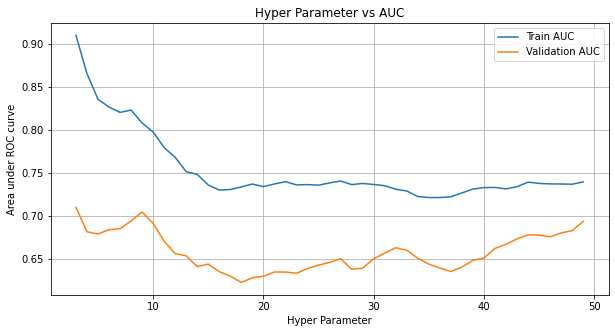

In [16]:
# plot Hyper parameter vs AUC
HyperparameterVSAucPlot(knn_results,"param_n_neighbors")

In [17]:
# print best parameters
# here we are choosing the best n_neighbors
n_neighbors = knn_clf.best_params_
print("For kNN Model")
print("Best parameters:",n_neighbors)
print("Test Score     :",knn_clf.score(X_test,y_test))

For kNN Model
Best parameters: {'n_neighbors': 3}
Test Score     : 0.6111111111111112


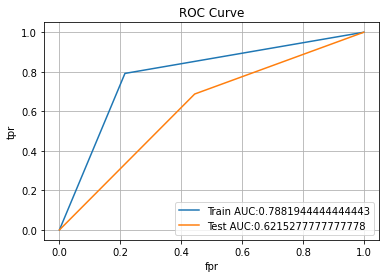

In [19]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# fit model on training data
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
# fit and calibrate model on training data
knn = CalibratedClassifierCV(knn_clf,cv=3)
knn.fit(X_train,y_train)
# evaluate the mode
ytrain_pred = knn.predict(X_train)
ytest_pred = knn.predict(X_test)
# Plot ROC Curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,ytrain_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,ytest_pred)
plt.plot(train_fpr,train_tpr,label="Train AUC:"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC:"+str(auc(test_fpr,test_tpr)))
plt.title("ROC Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.grid()
plt.legend()
plt.show()

Best threshold value:  1.0
Heat Map for Training Data:


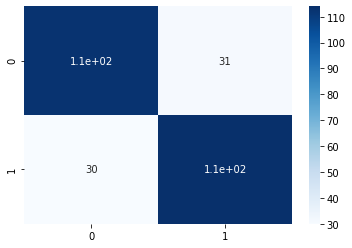

In [20]:
best_t = find_best_threshold(train_fpr,train_tpr,train_thresholds)
print("Heat Map for Training Data:")
sns.heatmap(confusion_matrix(y_train,compute_with_best_threshold(ytrain_pred,best_t)),annot=True,cmap="Blues")
plt.show()

Heat Map for Test Data:


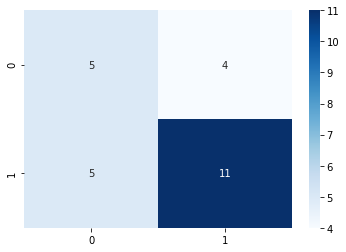

In [21]:
print("Heat Map for Test Data:")
sns.heatmap(confusion_matrix(y_test,compute_with_best_threshold(ytest_pred,best_t)),annot=True,cmap="Blues")
plt.show()

In [22]:
# Kaggle Submission Score 
knn_id = test_df['id']
knn_target = knn.predict_proba(test)[:,1]
knn_df = pd.DataFrame(np.column_stack((knn_id,knn_target)), columns=['id','target'])
knn_df['id'] = knn_df['id'].astype('int32')
knn_df.to_csv('knn.csv', index=False)

Kaggle Score For kNN Submission


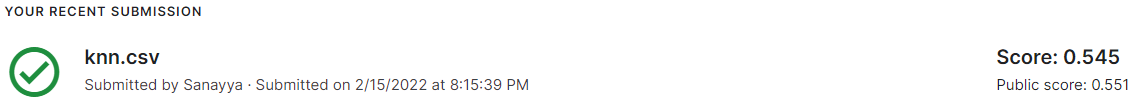

In [23]:
print("Kaggle Score For kNN Submission")
Image('./knn.png',width=800,height=100)

### 8.2 SVC (Support Vector Classification)

In [24]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# import Support Vector Classification
from sklearn.svm import SVC
# dictionary of hyper parameters
parameters = {"C":[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
# insance of SVC model
clf = SVC()
# call CrossValidationandHyperparameterTuning function
svc_clf = CrossValidationandHyperparameterTuning(clf,parameters)

In [25]:
# dictionary of all the evaluation metrics from the gridsearch
svc_results = pd.DataFrame.from_dict(svc_clf.cv_results_)
# sort svc_results based on param_C
svc_results = svc_results.sort_values(["param_C"])
print("Shape of Resultant Dataset:",svc_results.shape)
svc_results.head()

Shape of Resultant Dataset: (9, 21)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027401,0.001624,0.012801,0.001720,0.0001,{'C': 0.0001},0.808561,0.906064,0.831153,1.0,...,0.908663,0.080344,6,0.999773,1.0,1.0,1.0,1.0,0.999955,0.000091
1,0.031605,0.004801,0.012603,0.000488,0.001,{'C': 0.001},0.808561,0.906064,0.831153,1.0,...,0.908663,0.080344,6,0.999773,1.0,1.0,1.0,1.0,0.999955,0.000091
2,0.023205,0.005382,0.014204,0.002993,0.01,{'C': 0.01},0.808561,0.906064,0.831153,1.0,...,0.908663,0.080344,6,0.999773,1.0,1.0,1.0,1.0,0.999955,0.000091
3,0.020408,0.002417,0.014801,0.002315,0.1,{'C': 0.1},0.808561,0.906064,0.831153,1.0,...,0.908663,0.080344,9,0.999773,1.0,1.0,1.0,1.0,0.999955,0.000091
4,0.020406,0.002244,0.014998,0.003577,1,{'C': 1},0.828775,0.916766,0.843044,1.0,...,0.917717,0.073524,5,1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000


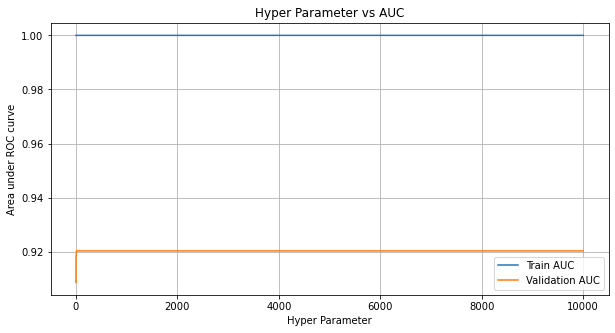

In [26]:
# plot Hyper parameter vs AUC
HyperparameterVSAucPlot(svc_results,"param_C")

In [27]:
# print best parameters
# here we are choosing the best C
C = svc_clf.best_params_
print("For SVC Model")
print("Best parameters:",C)
print("Test Score     :",svc_clf.score(X_test,y_test))

For SVC Model
Best parameters: {'C': 10}
Test Score     : 0.6875


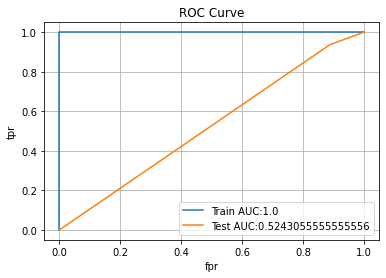

In [28]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# fit model on training data
svc_clf = SVC(C=10)
svc_clf.fit(X_train,y_train)
# fit and calibrate model on training data
svc = CalibratedClassifierCV(svc_clf,cv=3)
svc.fit(X_train,y_train)
# evaluate the mode
ytrain_pred = svc.predict(X_train)
ytest_pred = svc.predict(X_test)
# Plot ROC Curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,ytrain_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,ytest_pred)
plt.plot(train_fpr,train_tpr,label="Train AUC:"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC:"+str(auc(test_fpr,test_tpr)))
plt.title("ROC Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.grid()
plt.legend()
plt.show()

Best threshold value:  1.0
Heat Map for Training Data:


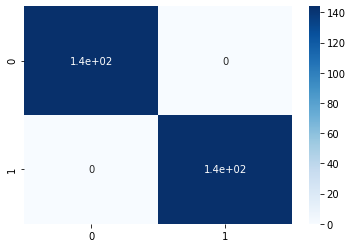

In [29]:
best_t = find_best_threshold(train_fpr,train_tpr,train_thresholds)
print("Heat Map for Training Data:")
sns.heatmap(confusion_matrix(y_train,compute_with_best_threshold(ytrain_pred,best_t)),annot=True,cmap="Blues")
plt.show()

Heat Map for Test Data:


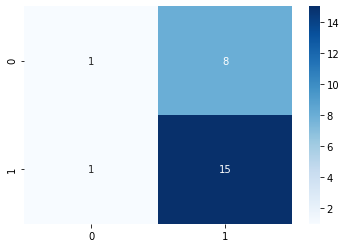

In [30]:
print("Heat Map for Test Data:")
sns.heatmap(confusion_matrix(y_test,compute_with_best_threshold(ytest_pred,best_t)),annot=True,cmap="Blues")
plt.show()

In [31]:
# Kaggle Submission Score 
svc_id = test_df['id']
svc_target = svc.predict_proba(test)[:,1]
svc_df = pd.DataFrame(np.column_stack((svc_id,svc_target)), columns=['id','target'])
svc_df['id'] = svc_df['id'].astype('int32')
svc_df.to_csv('svc.csv', index=False)

Kaggle Score For SVC Submission


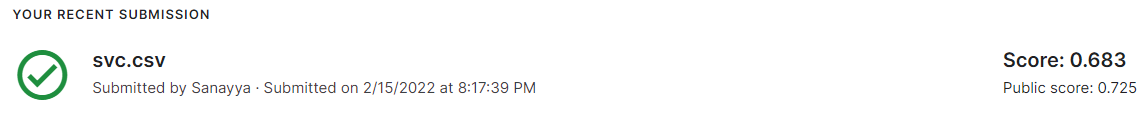

In [32]:
print("Kaggle Score For SVC Submission")
Image('./svc.png',width=800,height=100)

### 8.3 Logistic Regression

In [33]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# import LogisticRegression
from sklearn.linear_model import LogisticRegression
# dictionary of hyper parameters
parameters = {"C":[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}
# insance of LogisticRegression model
clf = LogisticRegression()
# call CrossValidationandHyperparameterTuning function
logreg_clf = CrossValidationandHyperparameterTuning(clf,parameters)

In [34]:
# dictionary of all the evaluation metrics from the gridsearch
logreg_results = pd.DataFrame.from_dict(logreg_clf.cv_results_)
# sort logreg_results based on param_C
logreg_results = logreg_results.sort_values(["param_C"])
print("Shape of Resultant Dataset:",logreg_results.shape)
logreg_results.head()

Shape of Resultant Dataset: (9, 21)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011406,0.002418,0.006000,0.000636,0.0001,{'C': 0.0001},0.783591,0.882283,0.783591,0.976601,...,0.872652,0.078648,9,0.984877,0.982533,0.993800,0.988831,0.985232,0.987055,3.928242e-03
1,0.015002,0.001093,0.006464,0.000697,0.001,{'C': 0.001},0.797860,0.890606,0.789536,0.976601,...,0.880822,0.076424,8,0.990624,0.989338,0.996446,0.993253,0.991604,0.992253,2.455739e-03
2,0.017692,0.003323,0.006405,0.000490,0.01,{'C': 0.01},0.828775,0.903686,0.815696,0.979064,...,0.900272,0.069197,7,0.999168,0.999849,0.999924,1.000000,0.999925,0.999773,3.062793e-04
3,0.019210,0.002134,0.007198,0.001172,0.1,{'C': 0.1},0.838288,0.908442,0.838288,0.980296,...,0.908137,0.062426,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.965068e-17
4,0.027410,0.009771,0.007401,0.000487,1,{'C': 1},0.843044,0.898930,0.837099,0.971675,...,0.904731,0.059232,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


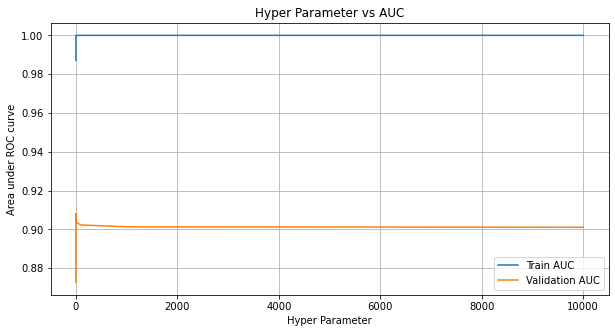

In [35]:
# plot Hyper parameter vs AUC
HyperparameterVSAucPlot(logreg_results,"param_C")

In [36]:
# print best parameters
# here we are choosing the best C
C = logreg_clf.best_params_
print("For LogisticRegression Model")
print("Best parameters:",C)
print("Test Score     :",logreg_clf.score(X_test,y_test))

For LogisticRegression Model
Best parameters: {'C': 0.1}
Test Score     : 0.6736111111111112


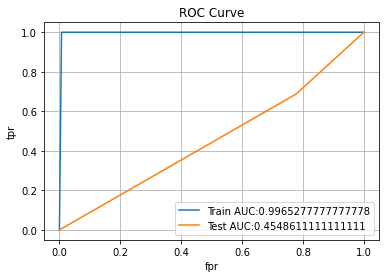

In [37]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# fit model on training data
logreg_clf = LogisticRegression(C=0.1)
logreg_clf.fit(X_train,y_train)
# fit and calibrate model on training data
logreg = CalibratedClassifierCV(logreg_clf,cv=3)
logreg.fit(X_train,y_train)
# evaluate the mode
ytrain_pred = logreg.predict(X_train)
ytest_pred = logreg.predict(X_test)
# Plot ROC Curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,ytrain_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,ytest_pred)
plt.plot(train_fpr,train_tpr,label="Train AUC:"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC:"+str(auc(test_fpr,test_tpr)))
plt.title("ROC Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.grid()
plt.legend()
plt.show()

Best threshold value:  1.0
Heat Map for Training Data:


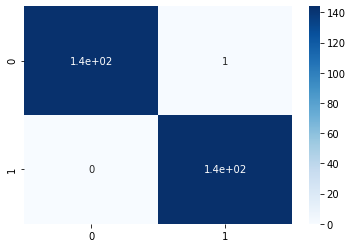

In [38]:
best_t = find_best_threshold(train_fpr,train_tpr,train_thresholds)
print("Heat Map for Training Data:")
sns.heatmap(confusion_matrix(y_train,compute_with_best_threshold(ytrain_pred,best_t)),annot=True,cmap="Blues")
plt.show()

Heat Map for Test Data:


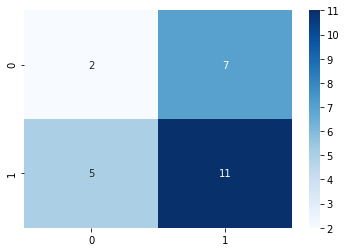

In [39]:
print("Heat Map for Test Data:")
sns.heatmap(confusion_matrix(y_test,compute_with_best_threshold(ytest_pred,best_t)),annot=True,cmap="Blues")
plt.show()

In [40]:
# Kaggle Submission Score 
logreg_id = test_df['id']
logreg_target = logreg.predict_proba(test)[:,1]
logreg_df = pd.DataFrame(np.column_stack((logreg_id,logreg_target)), columns=['id','target'])
logreg_df['id'] = logreg_df['id'].astype('int32')
logreg_df.to_csv('logisticregression.csv', index=False)

Kaggle Score For Logistic Regression Submission


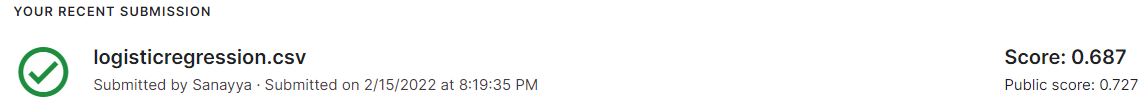

In [41]:
print("Kaggle Score For Logistic Regression Submission")
Image('./logisticregression.png',width=800,height=100)

### 8.4 GaussianNB (Gaussian Naive Bayes)

In [42]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# import Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# dictionary of hyper parameters
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
# insance of GaussianNB model
clf = GaussianNB()
# call CrossValidationandHyperparameterTuning function
gnb_clf = CrossValidationandHyperparameterTuning(clf,parameters)

In [43]:
# dictionary of all the evaluation metrics from the gridsearch
gnb_results = pd.DataFrame.from_dict(gnb_clf.cv_results_)
# sort logreg_results based on param_var_smoothing
gnb_results = gnb_results.sort_values(["param_var_smoothing"])
print("Shape of Resultant Dataset:",gnb_results.shape)
gnb_results.head()

Shape of Resultant Dataset: (100, 21)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
99,0.014817,0.007874,0.005789,0.001469,0.0,{'var_smoothing': 1e-09},0.828775,0.87396,0.829964,0.95936,...,0.889545,0.057847,20,0.997278,0.99569,1.0,0.998876,0.997976,0.997964,0.001457
98,0.010833,0.008973,0.014058,0.005567,0.0,{'var_smoothing': 1.2328467394420635e-09},0.828775,0.87396,0.829964,0.95936,...,0.889545,0.057847,20,0.997278,0.99569,1.0,0.998876,0.997976,0.997964,0.001457
97,0.015626,0.000002,0.000000,0.000000,0.0,{'var_smoothing': 1.519911082952933e-09},0.828775,0.87396,0.829964,0.95936,...,0.889545,0.057847,20,0.997278,0.99569,1.0,0.998876,0.997976,0.997964,0.001457
96,0.012498,0.006249,0.006249,0.007653,0.0,{'var_smoothing': 1.873817422860387e-09},0.828775,0.87396,0.829964,0.95936,...,0.889545,0.057847,20,0.997278,0.99569,1.0,0.998876,0.997976,0.997964,0.001457
95,0.009376,0.007656,0.006249,0.007653,0.0,{'var_smoothing': 2.310129700083158e-09},0.828775,0.87396,0.829964,0.95936,...,0.889545,0.057847,20,0.997278,0.99569,1.0,0.998876,0.997976,0.997964,0.001457


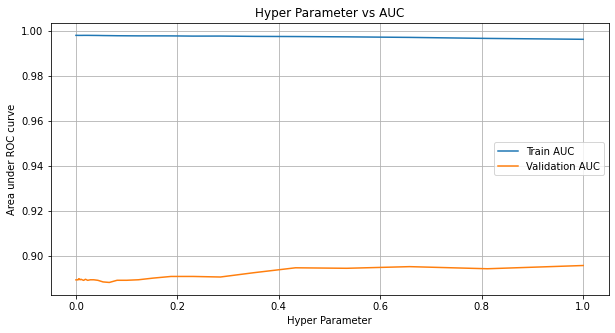

In [44]:
# plot Hyper parameter vs AUC
HyperparameterVSAucPlot(gnb_results,"param_var_smoothing")

In [45]:
# print best parameters
# here we are choosing the best var_smoothing
var_smoothing = gnb_clf.best_params_
print("For Gaussian Naive Bayes Model")
print("Best parameters:",var_smoothing)
print("Test Score     :",gnb_clf.score(X_test,y_test))

For Gaussian Naive Bayes Model
Best parameters: {'var_smoothing': 1.0}
Test Score     : 0.625


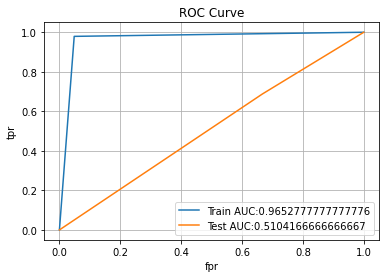

In [46]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# fit model on training data
gnb_clf = GaussianNB(var_smoothing=1.0)
gnb_clf.fit(X_train,y_train)
# fit and calibrate model on training data
gnb = CalibratedClassifierCV(gnb_clf,cv=3)
gnb.fit(X_train,y_train)
# evaluate the mode
ytrain_pred = gnb.predict(X_train)
ytest_pred = gnb.predict(X_test)
# Plot ROC Curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,ytrain_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,ytest_pred)
plt.plot(train_fpr,train_tpr,label="Train AUC:"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC:"+str(auc(test_fpr,test_tpr)))
plt.title("ROC Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.grid()
plt.legend()
plt.show()

Best threshold value:  1.0
Heat Map for Training Data:


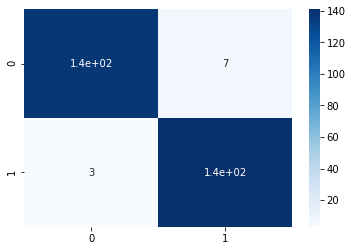

In [47]:
best_t = find_best_threshold(train_fpr,train_tpr,train_thresholds)
print("Heat Map for Training Data:")
sns.heatmap(confusion_matrix(y_train,compute_with_best_threshold(ytrain_pred,best_t)),annot=True,cmap="Blues")
plt.show()

Heat Map for Test Data:


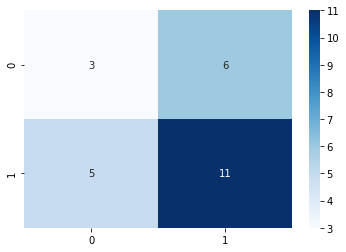

In [48]:
print("Heat Map for Test Data:")
sns.heatmap(confusion_matrix(y_test,compute_with_best_threshold(ytest_pred,best_t)),annot=True,cmap="Blues")
plt.show()

In [49]:
# Kaggle Submission Score 
gnb_id = test_df['id']
gnb_target = gnb.predict_proba(test)[:,1]
gnb_df = pd.DataFrame(np.column_stack((gnb_id,gnb_target)), columns=['id','target'])
gnb_df['id'] = gnb_df['id'].astype('int32')
gnb_df.to_csv('gaussiannaivebayes.csv', index=False)

Kaggle Score For Gaussian Naive Bayes Submission


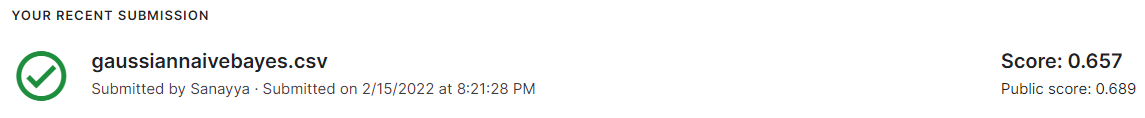

In [50]:
print("Kaggle Score For Gaussian Naive Bayes Submission")
Image('./gaussiannaivebayes.png',width=800,height=100)

### 8.5 Random Forest

In [63]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# dictionary of hyper parameters
parameters = {'n_estimators': [50,100,150,200,250,300,350,400,450,500],'max_depth': [2,3,5,7]}
# insance of RandomForestClassifier model
clf = RandomForestClassifier()
# call CrossValidationandHyperparameterTuning function
rfc_clf = CrossValidationandHyperparameterTuning(clf,parameters)

In [64]:
# dictionary of all the evaluation metrics from the gridsearch
rfc_results = pd.DataFrame.from_dict(rfc_clf.cv_results_)
print("Shape of Resultant Dataset:",rfc_results.shape)
rfc_results.head()

Shape of Resultant Dataset: (40, 22)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.127465,0.003891,0.009309,5.496441e-03,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.749108,0.753864,0.702735,...,0.798531,0.083482,40,0.994253,0.993422,0.992136,0.991154,0.993928,0.992979,0.001163
1,0.256861,0.009546,0.015627,1.907349e-07,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.799049,0.819263,0.801427,...,0.865967,0.073369,38,0.999395,0.999622,0.995236,0.999475,0.998876,0.998521,0.001661
2,0.396887,0.041914,0.028378,1.164864e-02,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.763377,0.835910,0.776457,...,0.864311,0.092059,39,0.999849,0.999849,0.999924,0.999475,0.999325,0.999685,0.000238
3,0.590686,0.060888,0.033941,1.540907e-02,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.778835,0.845422,0.818074,...,0.883540,0.087850,31,1.000000,0.999849,0.999546,0.999925,1.000000,0.999864,0.000168
4,0.691595,0.039515,0.034641,7.358088e-03,2,250,"{'max_depth': 2, 'n_estimators': 250}",0.826397,0.876338,0.796671,...,0.878945,0.065230,34,0.999849,0.999849,0.999546,0.998726,1.000000,0.999594,0.000458


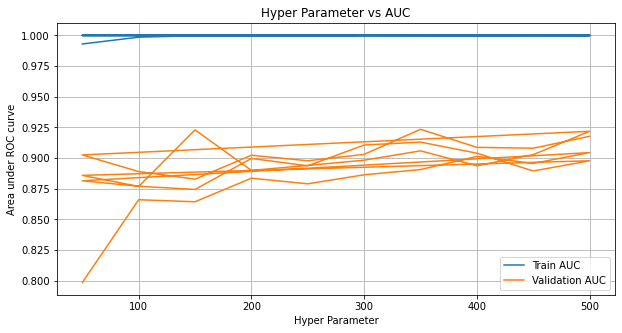

In [65]:
# plot Hyper parameter vs AUC
HyperparameterVSAucPlot(rfc_results,"param_n_estimators")

In [66]:
# print best parameters
# here we are choosing the best var_smoothing
rfc_param = rfc_clf.best_params_
print("For Random Forest Classifier Model")
print("Best parameters:",rfc_param)
print("Test Score     :",rfc_clf.score(X_test,y_test))

For Random Forest Classifier Model
Best parameters: {'max_depth': 7, 'n_estimators': 350}
Test Score     : 0.6666666666666666


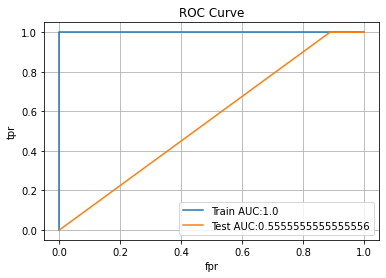

In [70]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# fit and calibrate model on training data
rfc_clf = RandomForestClassifier(max_depth=7,n_estimators=350)
rfc_clf.fit(X_train,y_train)
# fit and calibrate model on training data
rfc = CalibratedClassifierCV(rfc_clf,cv=3)
rfc.fit(X_train,y_train)
# evaluate the mode
ytrain_pred = rfc.predict(X_train)
ytest_pred = rfc.predict(X_test)
# Plot ROC Curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,ytrain_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,ytest_pred)
plt.plot(train_fpr,train_tpr,label="Train AUC:"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC:"+str(auc(test_fpr,test_tpr)))
plt.title("ROC Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.grid()
plt.legend()
plt.show()

Best threshold value:  1.0
Heat Map for Training Data:


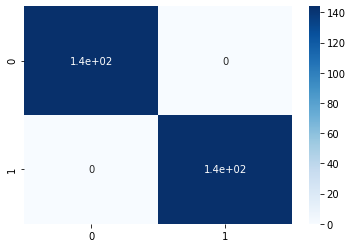

In [71]:
best_t = find_best_threshold(train_fpr,train_tpr,train_thresholds)
print("Heat Map for Training Data:")
sns.heatmap(confusion_matrix(y_train,compute_with_best_threshold(ytrain_pred,best_t)),annot=True,cmap="Blues")
plt.show()

Heat Map for Test Data:


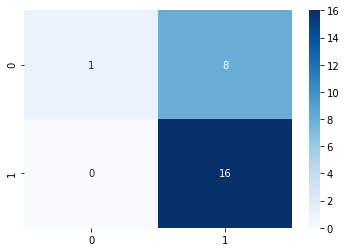

In [72]:
print("Heat Map for Test Data:")
sns.heatmap(confusion_matrix(y_test,compute_with_best_threshold(ytest_pred,best_t)),annot=True,cmap="Blues")
plt.show()

In [73]:
# Kaggle Submission Score 
rfc_id = test_df['id']
rfc_target = rfc.predict_proba(test)[:,1]
rfc_df = pd.DataFrame(np.column_stack((rfc_id,rfc_target)), columns=['id','target'])
rfc_df['id'] = rfc_df['id'].astype('int32')
rfc_df.to_csv('randomforestclassifier.csv', index=False)

Kaggle Score For Gaussian Naive Bayes Submission


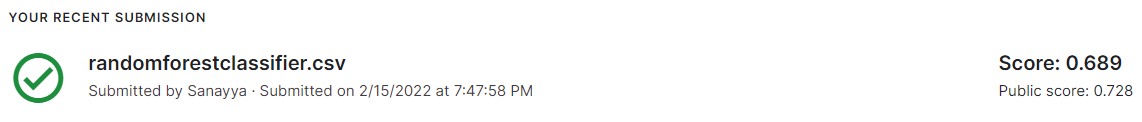

In [74]:
print("Kaggle Score For Gaussian Naive Bayes Submission")
Image('./randomforestclassifier.png',width=800,height=100)

### 8.6 xgboost

In [79]:
# Reference: https://xgboost.readthedocs.io/en/latest/python/python_api.html
# import xgboost
from xgboost import XGBClassifier 
# dictionary of hyper parameters
parameters = {'n_estimators': [50,100,150,200,250,300,350,400,450,500],'max_depth': [2,3,5,7]}
# insance of XGBClassifier model
clf = XGBClassifier()
# call CrossValidationandHyperparameterTuning function
xgb_clf = CrossValidationandHyperparameterTuning(clf,parameters)

[19:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [80]:
# dictionary of all the evaluation metrics from the gridsearch
xgb_results = pd.DataFrame.from_dict(xgb_clf.cv_results_)
print("Shape of Resultant Dataset:",xgb_results.shape)
xgb_results.head()

Shape of Resultant Dataset: (40, 22)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.551570,0.016202,0.006309,0.005266,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.790725,0.850178,0.841855,...,0.893596,0.083501,39,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
1,0.989688,0.033582,0.006331,0.006078,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.802616,0.868014,0.868014,...,0.907729,0.079033,17,1.0,1.0,1.0,1.0,1.0,1.0,4.965068e-17
2,1.218152,0.094783,0.009376,0.007655,2,150,"{'max_depth': 2, 'n_estimators': 150}",0.812128,0.881094,0.864447,...,0.911534,0.075733,1,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
3,1.362480,0.030431,0.015625,0.000002,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.808561,0.879905,0.865636,...,0.910820,0.076629,2,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00
4,1.481117,0.019302,0.012503,0.006252,2,250,"{'max_depth': 2, 'n_estimators': 250}",0.808561,0.879905,0.865636,...,0.910820,0.076629,2,1.0,1.0,1.0,1.0,1.0,1.0,0.000000e+00


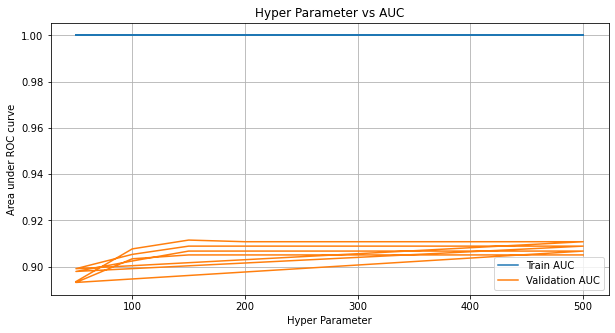

In [81]:
# plot Hyper parameter vs AUC
HyperparameterVSAucPlot(xgb_results,"param_n_estimators")

In [82]:
# print best parameters
# here we are choosing the best n_estimators and max_depth
xgb_param = xgb_clf.best_params_
print("For Random Forest Classifier Model")
print("Best parameters:",xgb_param)
print("Test Score     :",xgb_clf.score(X_test,y_test))

For Random Forest Classifier Model
Best parameters: {'max_depth': 2, 'n_estimators': 150}
Test Score     : 0.8402777777777778


[20:03:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:03:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

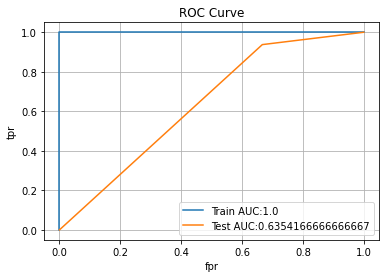

In [83]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# fit and calibrate model on training data
xgb_clf = XGBClassifier(max_depth=2,n_estimators=150)
xgb_clf.fit(X_train,y_train)
# fit and calibrate model on training data
xgb = CalibratedClassifierCV(xgb_clf,cv=3)
xgb.fit(X_train,y_train)
# evaluate the mode
ytrain_pred = xgb.predict(X_train)
ytest_pred = xgb.predict(X_test)
# Plot ROC Curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train,ytrain_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,ytest_pred)
plt.plot(train_fpr,train_tpr,label="Train AUC:"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC:"+str(auc(test_fpr,test_tpr)))
plt.title("ROC Curve")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.grid()
plt.legend()
plt.show()

Best threshold value:  1.0
Heat Map for Training Data:


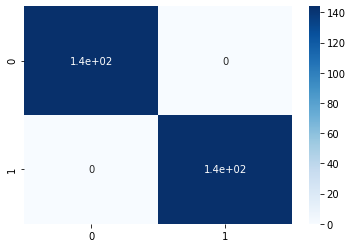

In [84]:
best_t = find_best_threshold(train_fpr,train_tpr,train_thresholds)
print("Heat Map for Training Data:")
sns.heatmap(confusion_matrix(y_train,compute_with_best_threshold(ytrain_pred,best_t)),annot=True,cmap="Blues")
plt.show()

Heat Map for Test Data:


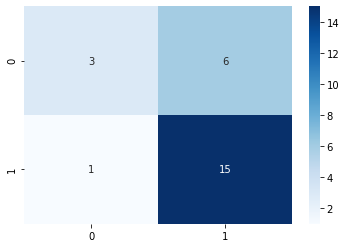

In [85]:
print("Heat Map for Test Data:")
sns.heatmap(confusion_matrix(y_test,compute_with_best_threshold(ytest_pred,best_t)),annot=True,cmap="Blues")
plt.show()

In [86]:
# Kaggle Submission Score 
xgb_id = test_df['id']
xgb_target = xgb.predict_proba(test)[:,1]
xgb_df = pd.DataFrame(np.column_stack((xgb_id,xgb_target)), columns=['id','target'])
xgb_df['id'] = xgb_df['id'].astype('int32')
xgb_df.to_csv('xgbclassifier.csv', index=False)

Kaggle Score For Gaussian Naive Bayes Submission


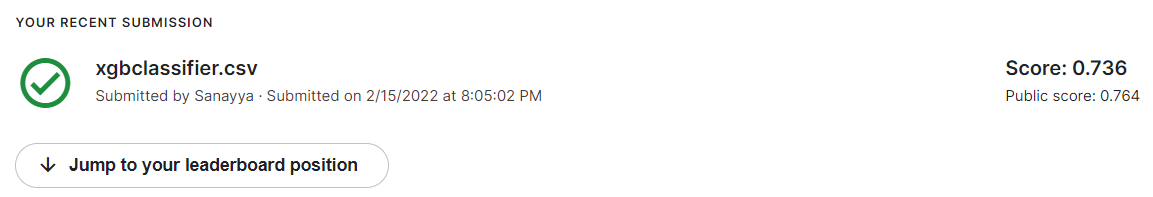

In [87]:
print("Kaggle Score For Gaussian Naive Bayes Submission")
Image('./xgbclassifier.png',width=800,height=100)

## 9. Ranking Models based on Kaggle Score

In [54]:
x = PrettyTable()
x.field_names = ['Rank','Model Name', 'Kaggle Private Ccore', 'Kaggle Public Score']
x.add_row([1,'XGBoost','0.736','0.764'])
x.add_row([2,'Random Forest','0.689','0.728'])
x.add_row([3,'Logistic Regression','0.687','0.727'])
x.add_row([4,'Support Vector Classifier', '0.683', '0.725'])
x.add_row([5,'Gaussian Naive Bayes','0.657','0.689'])
x.add_row([6,'k Nearest Neighbors','0.545','0.551'])
print(x)

+------+---------------------------+----------------------+---------------------+
| Rank |         Model Name        | Kaggle Private Ccore | Kaggle Public Score |
+------+---------------------------+----------------------+---------------------+
|  1   |          XGBoost          |        0.736         |        0.764        |
|  2   |       Random Forest       |        0.689         |        0.728        |
|  3   |    Logistic Regression    |        0.687         |        0.727        |
|  4   | Support Vector Classifier |        0.683         |        0.725        |
|  5   |    Gaussian Naive Bayes   |        0.657         |        0.689        |
|  6   |    k Nearest Neighbors    |        0.545         |        0.551        |
+------+---------------------------+----------------------+---------------------+


<b>Observations:</b>
<ol>
    1. We have taken the orignal dataset without adding any new features. <br>
    2. We are using oversampling technique to balance the dataset. <br>
    3. We are standardizing train and test features by removing the mean and scaling to unit variance. <br>
    4. We are applying 6 basic ML Models (kNN, Gaussian Naive Bayes, SVC, Logistic Regression, Random Forest XGBoost) on the train dataset. <br>
    5. XGBoost is giving us the best Kaggle score and kNN is giving us the worst Kagggle score.
</ol>

<b>Takeaways:</b>
<ol>
    1. Feature engineering is one of the most critical aspects of this Kaggle problem. So we will look to come up with various new statistics features. <br>
    2. Since a large number of unnecessary features could lead to overfitting, we will choose only the most essential features by applying PCA and Truncated SVD. <br>
    3. We’ll also try to build even more powerful models using ensembling, keeping Logistic Regression as the base model.
</ol>